In [1]:
from input import *



# Modellverifizierung{#sec-verifizierung}

Das vorangegangen Kapitel beschreibt das Konzept des Modells und liefert anhand des Einführungsbeispiel einen nachvollziehbaren Berechnungsablauf. Um sich von der Betrachtung eines fiktiven Beispiels zu lösen wird in diesem Kapitel die Anwendung des Federmodells auf die beiden Versuche der Vorarbeit @gitz_ansatze_2024 beschrieben. Dabei wird auf die relevanten Grundlagen der Versuche eingegangen. Detaillierte Beschriebe sind aus @gitz_ansatze_2024 und aus darin verwiesener Literatur zu entnehmen. 


Es wird aufgezeigt wie mittels dem Federmodell die Biegeverformungen bestimmt werden können. Zusätzlich wird auf die Ermittlung der Schubverformungen eingegangen. Dies bedingt eine entsprechende Ermittlung der Steifigkeit in Richtung der erwarteten Schubverformungen. Abschliessend wird ein Ansatz gezeigt um Längszugkräfte infolge Querkraft mit dem Modell abzubilden.

## Dreipunktbiegeversuch

Der Dreipunktbiegeversuch ist der dritte Versuch der Serie A in der zweiten Versuchsanordnung aus @jager_versuche_2006, kurz betitelt mit A3V2. Der Versuchsaufbau ist in der @fig-anordnung_a3v2 gezeigt. An der Stelle $A$ wird der Plattenstreifen bis zum Versagen belastet. Gemessen sind die Verformungen an der Stelle der Lasteinleitung nach dem Einbringen des Trägers auf dem Versuchsstand.

![Versuchsanordnung des Versuchs A3V2, Zeichnung entnommen aus @jager_versuche_2006](../imgs/versuchsanordnung_A3V2.svg){#fig-anordnung_a3v2}


Das Bewehrungslayout ist in der @fig-bewehrung_a3v2 aufgezeigt. Der Plattenstreifen ist mit einer durchgehenden Längsbewehrung in der Zugzone bewehrt. Verankert ist die Längsbewehrung mit angeschweissten Platten. Die Schubdübel sind nicht durchgängig verlegt.

![Bewehrunslayout des Versuchs A3V2, Zeichnung entnommen aus @jager_versuche_2006](../imgs/bewehrung_a3v2.svg){#fig-bewehrung_a3v2}



Die @fig-qs_a3v2 zeigt das Bewehrungslayout in querrichtung, sowie entsprechende Abmessungen des Plattenstreifens.

![Querschnitt des Versuchs A3V2, Zeichnung entnommen aus @gitz_ansatze_2024](../imgs/QS_Versuch_A3.svg){#fig-qs_a3v2}


### Modellierung

In diesem Abschnitt wird die Modellbildung beschrieben. Das Ziel ist es das Verhalten des Versuchskörpers mit einem möglichst simplen Modell abzubilden. Das statische System des Versuchs ist in @fig-system_a3v2 dargestellt. Das Eigengewicht wird vernachlässigt, da die Verformungsmessungen nach dem Einbau des Versuchs beginnen, bzw. erst bei Belastungsbeginn mit der Einzellast.


![Statisches System des Versuchs A3V2](../imgs/A3V2_system.svg){#fig-system_a3v2}

Die Auflagerbreiten werden vernachlässigt, bzw. wird der Plattenstreifen punktgestützt modelliert. Auf die Darstellung der biegesteifen Elemente mit Endgelenken wird verzichtet. Diese sind in einem Abstand von $10$ mm entlang der Stabachse verteilt.

In [2]:
%%render  params

l_E = 10*mm #Elementlänge des biegesteifen Stabs

<IPython.core.display.Latex object>

Der Einfluss der Elementlänge wurde mittels einer Sensitivitätsanalyse ermittelt. Eine feinere Stabunterteilung resultiert zu keiner signifikanten Steigerung der Genauigkeit.

#### Biegeverformungen

Um das Biegeverhalten passend zu beschreiben gilt es eine entsprechende Drehfedercharakteristik zu bestimmen. Dazu wird anhand einer Querschnittsanalyse eine Momenten-Krümmungs-Beziehung ermittelt. Durch Multiplikation der Krümmung mit der Elementlänge resultiert eine Momenten-Verdrehungs-Beziehung, sprich eine Drehfedercharakteristik. Es wird von einem Bilinearen Spannungs-Dehnungs-Verhalten des Betonstahls, sowie von einer linear-elastischen ideal plastischen Spannungs-Dehnungs-Beziehung des Betons mit Berücksichtigung der Zugfestigkeit ausgegangen. Für den Querschnitt ist die nicht-lineare Beziehung in der @fig-mchi_a3v2 gezeigt. Detaillierte Berechnungen sind in der Vorarbeit @gitz_ansatze_2024 zu finden.

In [3]:
# Read the text file using numpy
M_array = np.loadtxt("docs/M_A3V2.txt") * N * m
chi_array = np.loadtxt("docs/chi_A3V2.txt") / m

chi_zugversteifung_1_array = chi_array.copy()

chi_zugversteifung_1_array[2] = chi_array[2] - 0.00131 / m
chi_zugversteifung_1_array[3] = chi_array[3] - 0.00131 / m

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


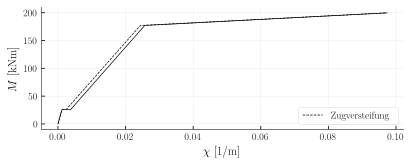

In [4]:
# | label: fig-mchi_a3v2
# | fig-cap: "Momenten-Krümmungs-Beziehung des Dreipunktbiegeversuchs, übernommen aus @gitz_ansatze_2024"


chi_interpolated = np.linspace(0, max(chi_array), 1000)
# Linear interpolation in M_array
M_interpolated = np.interp(chi_interpolated, chi_array, M_array)
M_1_interpolated = np.interp(chi_interpolated, chi_zugversteifung_1_array, M_array)
# Plot the interpolated data
plt.plot(
    chi_interpolated,
    M_1_interpolated.to(kN * m),
    color="black",
    linestyle="dashed",
    label="Zugversteifung",
)

plt.plot(chi_interpolated, M_interpolated.to(kN * m), color="black")
# plt.fill_between(chi_interpolated, M_interpolated / 10**3, color="black", alpha=0.1)
plt.xlabel("$\\chi$ [1/m]")
plt.ylabel("$M$ [kNm]")
plt.legend()
plt.savefig("imgs/M_chi_A3V2.svg")
plt.show()

Die Momenten-Krümmungs-Beziehung zeigt einen Bereich des ungerissenen Querschnitts, gefolgt vom gerissenen Bereich, welcher die Zugversteifung mit dem Ansatz nach Marti basierend auf dem Zuggurtmodell berücksichtigt. Beim Erreichen der Fliessspannung in den Bewehrungsstäben flacht die Beziehung deutlich ab. 

Die daraus resultierende Momenten-Verdrehungs-Beziehung ist in der @fig-mphi_a3v2 aufgezeigt. Diese ist den Stabendgelenken als Verdrehung in globaler $Y$-Richtung, gemäss @fig-system_a3v2, zu hinterlegen.

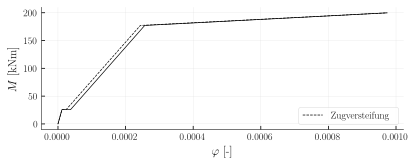

In [5]:
# | label: fig-mphi_a3v2
# | fig-cap: "Momenten-Verdrehungs-Beziehung des Dreipunktbiegeversuchs"



plt.plot(
    chi_interpolated*l_E.to(m).magnitude,
    M_1_interpolated.to(kN * m),
    color="black",
    linestyle="dashed",
    label="Zugversteifung",
)

plt.plot(chi_interpolated*l_E.to(m).magnitude, M_interpolated.to(kN * m), color="black")
# plt.fill_between(chi_interpolated, M_interpolated / 10**3, color="black", alpha=0.1)
plt.xlabel("$\\varphi$ [-]")
plt.ylabel("$M$ [kNm]")
plt.legend()
plt.savefig("imgs/M_phi_A3V2.svg")
plt.show()

#### Schubverformungen

Um die Schubverformungen im Modell abzubilden, gilt es eine Wegfedercharakteristik in globaler $Z$-Richtung, entsprechend dem Koordinatensystem aus @fig-system_a3v2, zu bestimmen. Als Grundlage zur Modellierung der Schubverformungen dient das Spannungsfeld-Modell in @fig-spannungsfelder_a3v2. Dabei wird vorausgesetzt, dass sämtliche Dehnung des Systems in vertikaler Richtung lediglich aus der Stabdehnung der Schubbewehrung erfolgt. 

![Einteilung in Spannungsfelder des Versuchs A3V2, Zeichnung entnommen aus @gitz_ansatze_2024](../imgs/Spannungsfelder_flach.svg){#fig-spannungsfelder_a3v2}

Durch die Einteilung in Spannungsfelder kann die Anzahl an mitwirkenden Schubdübeln bestimmt werden. Mit der Querschnittsfläche der mitwirkenden Dübel kann mittels dem nicht-linearen Spannungs-Dehnungs-Verhalten, gezeigt in der @fig-sigma-eps-a3v2, die Kraftkomponente ermittelt werden. Die Verformung wird mittels Multiplikation der Dehnungen aus der Spannungs-Dehnungs-Beziehung mit dem Hebelarm der inneren Kräfte bestimmt. Dies führt zu einer Kraft-Verformungs-Beziehung, sprich einer Wegfedercharakteristik für das gesamte Spannungsfeld. 

$$
\gamma_{E} = \frac{z \cdot \cot(\theta)}{n_{E}}
$$

$n_{E}$ steht für die Anzahl steifer Stabelemente

Abschliessend wird die Verformung um den Faktor gemäss der folgenden Gleichung reduziert, bzw. die Steifigkeit der Feder um diesen Faktor erhöht. Die daraus resultierende Wegfedercharakteristik ist den Stabendgelenken zu hinterlegen.

In [6]:
sigma_w_A3V2 = np.array([0.0, 546, 630]) * N / mm**2

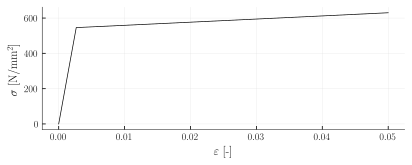

In [7]:
# | label: fig-sigma-eps-a3v2
# | fig-cap: "Spannungs-Dehnungs-Beziehung der Schubbewehrung, übernommen aus @gitz_ansatze_2024"


epsilon_w_A3V2 = np.array([0.0, 546 / 205000, 0.05])

plt.plot(epsilon_w_A3V2, sigma_w_A3V2, color="black")
# plt.fill_between(to_float(epsilon_w_A3V2), sigma_w_A3V2, color="black", alpha=0.1)
plt.xlabel("$\\varepsilon$ [-]")
plt.ylabel("$\\sigma$ [N/mm$^2$]")
plt.savefig("imgs/sigma_epsilon_A3V2.svg")

plt.show()

Folgend sind die Parameter zur Bestimmung der Wegfedercharakteristik in vertikaler Richtung gezeigt. Der gewählte Neigungswinkel der Spannungsfelder $\theta_{c3}$ gilt grundsätzlich nur im Bruchzustand. Als Approximation wird die daraus bestimmte Wegfedercharakteristik für sämtliche Laststufen angesetzt. Dies führt zu Abweichungen des Verformungsverhalten im Lastniveau unterhalb der Traglast. Da der Einfluss der Schubverformungen jedoch gering ist, ist diese Vereinfachung unproblematisch.

In [8]:
%%render params

Diam_sw = (6 * mm)
S_sw = (80 * mm)
b_w = (800 * mm)
E_sw = (205000 * N / mm**2)
z = 140*mm
theta_c3 = 34.3*deg
f_su = 630*N/mm**2



<IPython.core.display.Latex object>

In einem ersten Schritt wird die Querschnittsfläche der Schubbewehrung bestimmt. Gemäss der @fig-bewehrung_a3v2 ist ersichtlich, dass entlang der Plattenbreite $7$ Schubdübel verlegt sind. Die Querschnittsfläche für eine Dübelreihe folgt somit zu:

In [9]:
%%render symbolic

A_sw = 7 * (Diam_sw / 2) ** 2 * pi


<IPython.core.display.Latex object>

In [10]:
%%render params

A_sw

<IPython.core.display.Latex object>

Wird diese nun über einen Meterstreifen verschmiert, so folgt:

In [11]:
%%render symbolic
a_sw = A_sw / (S_sw).to(m)

<IPython.core.display.Latex object>

In [12]:
%%render params
a_sw

<IPython.core.display.Latex object>

In einem nächsten Schritt wird der Querkraftwiderstand bestimmt. Dies dient grundsätzlich zur Bestimmung des Neigungswinkel. Aus den Versuchsergebnissen ist ersichtlich, dass der Plattenstreifen bei $320$ kN versagt. Somit muss ein Spannungsfeld gewählt werden, welches einen Querkraftwiderstand entsprechend der Traglast liefert. Durch Iteration dieser Gleichung wurde der Neigungswinkel $\theta_{c3}$ ermittelt.

In [13]:
%%render symbolic

V_Rd = a_sw * z * f_su / tan(theta_c3)

<IPython.core.display.Latex object>

In [14]:
%%render params

V_Rd = V_Rd.to(kN)

<IPython.core.display.Latex object>

In [15]:
F_w_A3V2 = sigma_w_A3V2 * 3 * A_sw
E_s_A3V2 = sigma_w_A3V2 / epsilon_w_A3V2

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\pint\facets\plain\quantity.py:976: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(self._magnitude, other_magnitude)


Abschliessend gilt es den Reduktionsfaktor zu bestimmen:

In [16]:
%%render 0
gamma_E_A3V2 = z * 1/tan(theta_c3) / l_E


<IPython.core.display.Latex object>

In [17]:
u_sw_A3V2 = epsilon_w_A3V2 * z / gamma_E_A3V2

Die @fig-wegfeder-schub-a3v2 zeigt das ermittelte Kraft-Verformungs-Verhalten. Das Verhalten ist analog dem bilinearen Spannungs-Dehnungs-Diagramm.

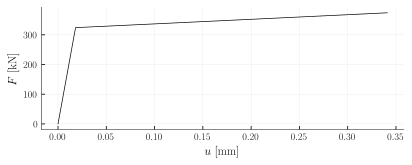

In [18]:
# | label: fig-wegfeder-schub-a3v2
# | fig-cap: "Berechnete Wegfedercharakteristik des Schubgelenks vom Versuch A3V2"


plt.plot(u_sw_A3V2, F_w_A3V2.to(kN), color="black")
# plt.fill_between(u_sw_A3V2, F_w_A3V2.to(kN), color="black", alpha=0.1)
plt.xlabel("$u$ [mm]")
plt.ylabel("$F$ [kN]")
plt.show()

### Ergebnisse

Mit den bestimmten Federcharakteristiken kann die Verformungslinie des Systems ermittelt werden. Das Modell ist in der Lage, Biege- und Schubverformungen zu beschreiben, basierend auf nicht-linearen Eigenschaften. Die @fig-fwa3v2 zeigt das Last-Verformungs-Diagramm des Systems am Punkt $w_1$. Gezeigt sind die Resultate des Modells, mit und ohne Berücksichtigung der Zugversteifung, sowie die gemessenen Versuchsresultate aus dem Versuchsbericht. Das Modell beschreibt den Verformungsverlauf zufriedenstellend.

In [19]:
# Versuch Jaeger
w_1_versuch_A3V2 = np.array(
    [2.6, 10.2, 10.3, 11.5, 11.6, 13, 13.1, 14.9, 15.1, 23.8, 24.3, 35.4, 39.4, 40.1]
)
F_A_versuch_A3V2 = np.array(
    [
        0,
        211.3,
        204.1,
        241.9,
        236.8,
        271.3,
        260.3,
        300.6,
        287.7,
        324.6,
        293.5,
        331.2,
        325.1,
        301.8,
    ]
)


# Read the Excel file
modell_A3V2 = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="A3V2_Knotenfedern"
)
modell_A3V2_zugversteift = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="A3V2_Knotenfedern_zugversteift"
)

F_a3v2_model = 320

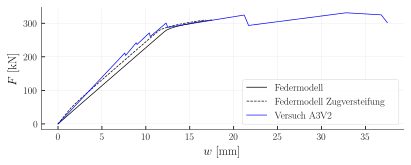

In [20]:
# | label: fig-fwa3v2
# | fig-cap: "Last-Verformungs-Verlauf am Punkt $w_1$ mit dem Federmodell und den Versuchsmessungen"


w_calc_a3v2 = modell_A3V2["eZ_1 [mm]"] * -1
F_calc_a3v2 = modell_A3V2["Lpa"] * F_a3v2_model

w_calc_a3v2_zugversteift = modell_A3V2_zugversteift["eZ_1 [mm]"] * -1
F_calc_a3v2_zugversteift = modell_A3V2_zugversteift["Lpa"] * F_a3v2_model


plt.plot(w_calc_a3v2, F_calc_a3v2, color="black", label="Federmodell")
plt.plot(
    w_calc_a3v2_zugversteift,
    F_calc_a3v2_zugversteift,
    color="black",
    linestyle="dashed",
    label="Federmodell Zugversteifung",
)

plt.plot(
    w_1_versuch_A3V2 - w_1_versuch_A3V2[0],
    F_A_versuch_A3V2,
    color="blue",
    label="Versuch A3V2",
)
plt.xlabel("$w$ [mm]")
plt.ylabel("$F$ [kN]")
plt.legend()
plt.savefig("imgs/F_w_nachrechnung_A3V2.svg")
plt.show()

In [21]:
DF_A3V2_LS320 = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="A3V2_Federmodell_maxlast"
)
x_array_A3V2 = np.linspace(0, 2620, len(DF_A3V2_LS320.iloc[:, 0]))

Der Verdrehungsverlauf in @fig-phi-max-a3v2 lässt sich ebenfalls direkt aus dem Modell exportieren. Durch die Ableitung des Verlaufs resultiert der Krümmungsverlauf, dargestellt in @fig-chi-max-a3v2.

In [22]:
A_s_staender = 3 * A_sw
expr_A = sp.sympify("pi*D**2/4")

Diam_staender = sp.solve(sp.Eq(A_s_staender.magnitude, expr_A), "D")[1].evalf(5) * mm

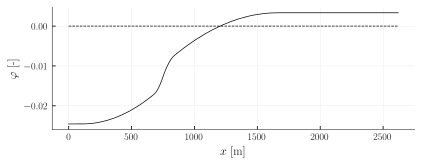

In [23]:
# | label: fig-phi-max-a3v2
# | fig-cap: "Verdrehungsverlauf aus dem Federmodell für die Höchstlast"


plt.plot(x_array_A3V2, DF_A3V2_LS320.iloc[:, -3], color="black")
plt.plot(x_array_A3V2, np.zeros(x_array_A3V2.shape), color="black", linestyle="dashed")

plt.xlabel("$x$ [m]")
plt.ylabel("$\\varphi$ [-]")
plt.show()

Der Krümmungsverlauf gibt Aufschluss über den Fliessbereich der Bewehrung, bzw. über den Steifigkeitenverlauf entlang der Stabachse.

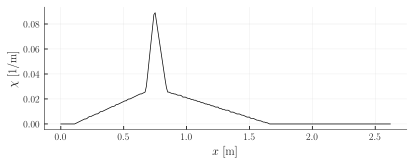

In [24]:
# | label: fig-chi-max-a3v2
# | fig-cap: "Berechneter Krümmungsverlauf aus dem Verdrehungsverlauf"


chi_a3v2 = np.gradient(DF_A3V2_LS320.iloc[:, -3], 0.01)

plt.plot(x_array_A3V2 / 1000, chi_a3v2, color="black")
plt.ylabel("$\\chi$ [1/m]")
plt.xlabel("$x$ [m]")
plt.savefig("imgs/kruemmungsverlauf_A3V2_axis.svg")
plt.show()

In [25]:
A_s_zuggurt = 2262 * mm**2

Diam_zuggurt = sp.solve(sp.Eq(A_s_zuggurt.magnitude, expr_A), "D")[1].evalf(5) * mm
# display_eq('/oslash_zuggurt',Diam_zuggurt.evalf(3))

{{<pagebreak>}}

## Vierpunktbiegeversuch

Der Vierpunktbiegeversuch ist aus der Publikation @tue_einfluss_2019 entnommen. Es handelt sich um einen Träger mit rechteckigem Querschnitt, gelagert als einfacher Balken. Auffallend bei diesem Versuch ist die niedrig gehaltene Schubbewehrung. Dazu
sind in Längsrichtung Stäbe mit unterschiedlicher Güte verlegt. Die Materialeigenschaften für den Bst 550 sind in @marienhutte_produktdatenblatt_b550bpdf_nodate ersichtlich.


![Bewehrungslayout des Versuchs SV14, Zeichnung entnommen aus @gitz_ansatze_2024](../imgs/versuchsskizze_14.svg){#fig-versuchsskizze-SV14}


Die @fig-versuchsskizze-SV14 zeigt die Lagerung des Trägers, sowie die Stellen der Lasteinleitung. Zusätzlich ist das Bewehrungslayout dargestellt. Der Querschnitt ist in der @fig-QS-SV14 gezeigt. Es ist lediglich die Längsbewehrung dargestellt.

![Querschnitt des Versuchs SV14, Zeichnung entnommen aus @gitz_ansatze_2024](../imgs/QS_Versuch14.svg){#fig-QS-SV14}


Belastet wird der Träger an beiden Stellen $F_A$ bis zum Versagen. Aufgrund des unterschiedlichen Schubbewehrungsgehalts in beiden Trägerhälften erfolgt zuerst ein Schubversagen in der schwächer bewehrten Zone. Diese wird nachträglich verstärkt. Abschliessend wird die Last gesteigert, bis ein Schubversagen in der stärker bewehrten Zone eintritt. Die gemessenen Verformungen sind an der Stelle $w_1$.


### Modellierung

Das statische System ist in der @fig-system-SV14 gezeigt. Die Auflagerbreite wird vernachlässigt. Die Messungen der Durchbiegungen zeigt, dass die Verformung bei $F_A = 0$ ebenfalls null ist. Dies führt zur Annahme, dass der Einfluss des Eigengewichts nicht gemessen wurde. Somit wird dieses vernachlässigt.

![Statisches System des Versuchs SV14, Zeichnung entnommen aus @gitz_ansatze_2024](../imgs/statisches_system_14.svg){#fig-system-SV14}

Auf die Darstellung der biegesteifen Elemente mit Endgelenken wird verzichtet. Diese sind in einem Abstand von $10$ mm entlang der Stabachse verteilt.






In [26]:
%%render 

l_E #Elementlänge des biegesteifen Stabs

<IPython.core.display.Latex object>

Analog zum Dreipunktbiegeversuch wurde die Elementlänge mittels einer Sensitivitätsanalyse emittelt. Eine feinere Stabunterteilung liefert keine Verbesserung hinsichtlich der Präzision der Resultate.

In [27]:
F_A = 105*kN
L_1 = 1.5*m
M_max = F_A * L_1
M_y_SV14_sk = [0, M_max.magnitude, M_max.magnitude, 0]
x_SV14_sk = [0,1.5, 2.5,4]


#### Biegeverformungen

Als Grundlage für die Drehfedercharakteristik gilt die Momenten-Krümmungs-Beziehung. Für den Querschnitt des Versuchs SV14 gilt die Beziehung gemäss @fig-mchi_sv14. Für detaillierte Berechnungen ist die Vorarbeit @gitz_ansatze_2024 zu konsultieren. Die Beziehung wurde basierend auf bilinearen Spannungs-Dehnungs-Beziehungen für den Betonstahl und linear-elastischen ideal-plastischen Spannungs-Dehnungs-Beziehungen für den Beton mit Berücksichtigung der Zugfestigkeit bestimmt.

In [28]:
# Read the text file using numpy
M_SV14_array = np.loadtxt("docs/M_SV14.txt") * N * m
chi_SV14_array = np.loadtxt("docs/chi_SV14.txt") / m
chi_SV14_zugversteifung_1_array = chi_SV14_array.copy()
chi_SV14_zugversteifung_1_array[2] = chi_SV14_array[2] - 0.000779 / m
chi_SV14_zugversteifung_1_array[3] = chi_SV14_array[3] - 0.000779 / m
chi_SV14_zugversteifung_1_array[4] = chi_SV14_array[4] - 0.000779 / m

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\matplotlib\cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


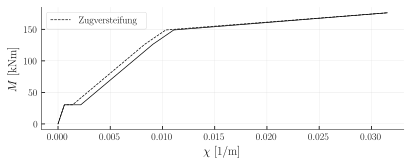

In [29]:
# | label: fig-mchi_sv14
# | fig-cap: "Momenten-Krümmungs-Beziehung des Vierpunktbiegeversuchs, übernommen aus @gitz_ansatze_2024"


chi_SV14_interpolated = np.linspace(0, max(chi_SV14_array), 1000)
# Linear interpolation in M_array
M_SV14_interpolated = np.interp(chi_SV14_interpolated, chi_SV14_array, M_SV14_array)

M_SV14_1_interpolated = np.interp(
    chi_SV14_interpolated, chi_SV14_zugversteifung_1_array, M_SV14_array
)
# Plot the interpolated data


# Plot the interpolated data
plt.plot(chi_SV14_interpolated, M_SV14_interpolated.to(kN * m), color="black")
plt.plot(
    chi_SV14_interpolated,
    M_SV14_1_interpolated.to(kN * m),
    color="black",
    linestyle="dashed",
    label="Zugversteifung",
)


# plt.fill_between(chi_SV14_interpolated, M_SV14_interpolated / 10**3, color="black", alpha=0.1)
plt.xlabel("$\\chi$ [1/m]")
plt.ylabel("$M$ [kNm]")
plt.savefig("imgs/M_chi_SV14.svg")
plt.legend()

plt.show()

Die Momenten-Krümmungs-Beziehung beschreibt das Biegeverhalten des Querschnitts für positive Biegung. Der Querschnitt ist deutlich steifer vor dem Reissen. Nach dem Reissen des Querschnitts reduziert sich die Biegesteifigkeit, dargestellt mit dem Bereich mit der Zugversteifung. Die Zugversteifung wurde mittels dem Ansatz nach Marti, basierend auf dem Zuggurtmodell bestimmt. In diesem Bereich ist ebenfalls ein Knick erkennbar, dieser charaktisiert das Fliessen der schwächeren Bewehrung im Zugbereich. Der grosse Steifigkeitsabfall resultiert durch das Fliessen der starken Zugbewehrung.

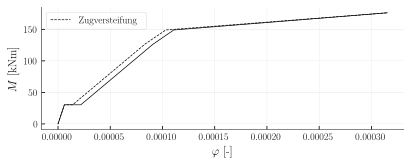

In [30]:
# | label: fig-mphi_sv14
# | fig-cap: "Momenten-Verdrehungs-Beziehung des Vierpunktbiegeversuchs"


# Plot the interpolated data
plt.plot(chi_SV14_interpolated*l_E.to(m).magnitude, M_SV14_interpolated.to(kN * m), color="black")
plt.plot(
    chi_SV14_interpolated*l_E.to(m).magnitude,
    M_SV14_1_interpolated.to(kN * m),
    color="black",
    linestyle="dashed",
    label="Zugversteifung",
)


plt.xlabel("$\\varphi$ [-]")
plt.ylabel("$M$ [kNm]")
plt.savefig("imgs/M_phi_SV14.svg")
plt.legend()

plt.show()

Die Momenten-Verdrehung-Beziehung ist in der @fig-mphi_sv14 dargestellt. Diese ist den Stabendgelenken als Verdrehung in globaler $Y$-Richtung, gemäss dem Koordinatensystem in der @fig-system-SV14, zu hinterlegen. Da die Längsbewehrung nicht abgestuft ist, bzw. der Querschnitt für den gesamten Stab gilt, ist diese Beziehung für sämtliche Elemente gültig.

#### Versatzmass

Das Versatzmass berücksichtigt die Längszugkraft aus der Querkraft. Zur Bestimmung des Versatzmass wird der Träger in Spannungsfelder eingeteilt. Die Neigung der Spannungsfelder wird mittels der Traglast bestimmt, welcher für den stärker schubbewehrten Bereich gilt. Es wird ein Neigungswinkel $\theta_{c3}$ gewählt um einen Querkraftwiderstand zu erreichen, welcher der Traglast entspricht.

Anhand der Spannungsfeldeinteilung wird der Gurtkraftverlauf für den unter- und den Obergurt bestimmt. Wird dem Zuggurt die Längszugkraft aus dem Biegemoment subtrahiert, so resultiert das Versatzmass. Dies wird folgend aufgezeigt. Zuerst sind die verwendeten Parameter aufgezeigt:

In [31]:
%%render params

V_exp_sv14 = (105 *kN)
z_SV14 = (359 * mm)
Diam_sw_SV14 = (4.3 * mm)
b_w_SV14 = (170 * mm)
S_sw_SV14 = (150 * mm)
f_su_SV14 = 715*N/mm**2 
theta_c3_SV14 = 25.5789*deg

F_B = (105*kN)
F_A = V_exp_sv14



<IPython.core.display.Latex object>

Mit der gewählten Neigung der Betondruckdiagonale resultiert der nötige Querkraftwiderstand. Dazu wird zuerst die Querschnittsfläche der Schubbewehrung bestimmt. Für den zweischenkligen Bügel folgt diese zu:

In [32]:
%%render symbolic

A_sw_SV14 = 2 * (Diam_sw_SV14 / 2) ** 2 * pi


<IPython.core.display.Latex object>

In [33]:
%%render params

A_sw_SV14

<IPython.core.display.Latex object>

Verschmiert über einen Meterstreifen resultiert:

In [34]:
%%render symbolic
a_sw_SV14 = A_sw_SV14 / S_sw_SV14


<IPython.core.display.Latex object>

In [35]:
%%render params

a_sw_SV14 = a_sw_SV14.to(mm**2/m)

<IPython.core.display.Latex object>

Und abschliessend folgt der Querkraftwiderstand zu:

In [36]:
%%render symbolic
V_Rd_SV14 = a_sw_SV14 * z_SV14 * f_su_SV14 /tan(theta_c3_SV14)


<IPython.core.display.Latex object>

In [37]:
%%render params

V_Rd_SV14 = V_Rd_SV14.to(kN)

<IPython.core.display.Latex object>

Der Querkraftwiderstand ist etwa gleich der Querkraft beim Erreichen der Traglast. Die Spannungsfeldeinteilung ist in der @fig-spannungsfelder_sv14 gezeigt. Die Feldneigung ist näherungsweise an die berechnete Neigung angepasst.

![Einteilung in Spannungsfelder](../imgs/SV14_spannungsfelder.svg){#fig-spannungsfelder_sv14}

Wird nun Gleichgewicht an den entsprechenden Spannungsfeldern ausgeübt, so lässt sich der Zug- und Druckkraftverlauf bestimmen. Für den zentrierten Fächer beim Auflager gilt das Schnittkörperdiagramm in der @fig-skd_1_spannungsfelder_sv14.

![Schnittkörperdiagramm des zentrierten Fächers](../imgs/SV14_skd_1.svg){#fig-skd_1_spannungsfelder_sv14}


Die Kraft im Untergurt lässt sich durch Momentengleichgewicht um den Punkt $O'$ bestimmen.

In [38]:
%%render symbolic
F_inf_1 = F_B * z_SV14/tan(theta_c3_SV14)/2 / z_SV14 



<IPython.core.display.Latex object>

In [39]:
%%render
F_inf_1


<IPython.core.display.Latex object>

Durch das Gleichgewicht der horizontalen Kräfte folgt die Obergurtkraft:

In [40]:
%%render symbolic
F_sup_1 = F_inf_1


<IPython.core.display.Latex object>

In [41]:
%%render
F_sup_1

<IPython.core.display.Latex object>

Mittels Gleichgewicht der vertikalen Kräfte folgt die Kraft in der Schubbewehrung:

In [42]:
%%render symbolic
f_sw_1 = F_B / z_SV14/tan(theta_c3_SV14)


<IPython.core.display.Latex object>

In [43]:
%%render params
f_sw_1 = f_sw_1.to(kN/m)

<IPython.core.display.Latex object>

Am zentrierten Fächer schliesst das Parallelfeld an. Das entsprechende Schnittkörperdiagramm zeigt die @fig-skd_2_spannungsfelder_sv14.

![Schnittkörperdiagramm des Parallelfelds](../imgs/SV14_skd_2.svg){#fig-skd_2_spannungsfelder_sv14}


Durch Gleichgewicht der Momente um den Punkt $O'$ folgt wiederum die Untergurtkraft:

In [44]:
%%render symbolic

F_inf_2 = F_B * 3/2*z_SV14/tan(theta_c3_SV14) / z_SV14

<IPython.core.display.Latex object>

In [45]:
%%render params

F_inf_2

<IPython.core.display.Latex object>

Die Obergurtkraft folgt aus dem Gleichgewicht der horizontalen Kräfte:

In [46]:
%%render symbolic
F_sup_2 = F_inf_2


<IPython.core.display.Latex object>

In [47]:
%%render 
F_sup_2

<IPython.core.display.Latex object>

Abschliessend folgt die Kraft in der Schubbewehrung zu:

In [48]:
%%render symbolic

f_sw_2 = F_B / z_SV14/tan(theta_c3_SV14)


<IPython.core.display.Latex object>

In [49]:
%%render params
f_sw_2 = f_sw_2.to(kN/m)

<IPython.core.display.Latex object>

Das Schnittkörperdiagramm bei der Krafteinleitung ist in der @fig-skd_3_spannungsfelder_sv14 gezeigt.


![Schnittkörperdiagramm des zentrierten Fächers 2](../imgs/SV14_skd_3.svg){#fig-skd_3_spannungsfelder_sv14}

Die Untergurtkraft folgt zu:

In [50]:
%%render symbolic
F_inf_3 = F_B * 2*z_SV14/tan(theta_c3_SV14) / z_SV14


<IPython.core.display.Latex object>

In [51]:
%%render params
F_inf_3

<IPython.core.display.Latex object>

Die Obergurtkraft entspricht dabei:

In [52]:
%%render symbolic
F_sup_3 = F_inf_3

<IPython.core.display.Latex object>

In [53]:
%%render params

F_sup_3

<IPython.core.display.Latex object>

In [54]:
theta_c3_SV14_array = np.linspace(90*deg, theta_c3_SV14, 1000)


Damit ist abschliessend der Gurtkraftverlauf definiert. Dargestellt ist dieser in @fig-gurtkraft_sv14. Ebenfalls aufgezeigt ist der Anteil im Untergurt aus dem Biegemoment. Die Differenz zwischen der gesamten Untergurtkraft und dem Anteil aus dem Biegemoment führt zum Versatzmass.

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\numpy\ma\core.py:2359: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=False, subok=True)


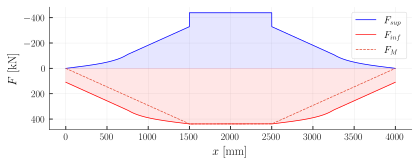

In [55]:
# | label: fig-gurtkraft_sv14
# | fig-cap: "Gurtkraftverläufe bestimmt anhand der Spannungsfelder in @fig-spannungsfelder_sv14. Dargestellt ist der gesamte Gurtkraftverlauf, sowie der Anteil aus dem Biegemoment"

x_sv14_segment = np.linspace(0, z_SV14 / tan(theta_c3_SV14), 1000)

x_sv14_concat = np.concatenate(
    (
        np.linspace(0, 2 * z_SV14 / tan(theta_c3_SV14), 2000),
        np.linspace(
            z_SV14 / tan(theta_c3_SV14) * 2,
            z_SV14 / tan(theta_c3_SV14) * 2 + 1000 * mm,
            1000,
        ),
        np.linspace(
            z_SV14 / tan(theta_c3_SV14) * 2 + 1000 * mm,
            z_SV14 / tan(theta_c3_SV14) * 2
            + 1000 * mm
            + 2 * z_SV14 / tan(theta_c3_SV14),
            2000,
        ),
    ),
    axis=0,
)

F_sup_array_sv14 = np.concatenate(
    (
        (F_B * z_SV14 / tan(theta_c3_SV14_array) / 2 / z_SV14).magnitude,
        (F_B * (z_SV14 / tan(theta_c3_SV14) / 2 + x_sv14_segment) / z_SV14).magnitude,
        np.ones(1000) * F_inf_3.magnitude,
        np.flip(
            F_B * (z_SV14 / tan(theta_c3_SV14) / 2 + x_sv14_segment) / z_SV14
        ).magnitude,
        np.flip(F_B * z_SV14 / tan(theta_c3_SV14_array) / 2 / z_SV14).magnitude,
    ),
    axis=0,
)


verlauf_inf_1 = (
    (z_SV14 / tan(theta_c3_SV14) / 2 + x_sv14_segment) * F_B / z_SV14
).magnitude

verlauf_inf_2 = (
    F_B
    * (2 * z_SV14 / tan(theta_c3_SV14) - z_SV14 / tan(np.flip(theta_c3_SV14_array)) / 2)
    / z_SV14
).magnitude

verlauf_inf_3 = np.ones(1000) * F_inf_3.magnitude

F_inf_array_sv14 = np.concatenate(
    (
        verlauf_inf_1,
        verlauf_inf_2,
        verlauf_inf_3,
        np.flip(verlauf_inf_2),
        np.flip(verlauf_inf_1),
    ),
    axis=0,
)


plt.plot(x_sv14_concat, -F_sup_array_sv14, color="blue", label="$F_{{sup}}$")
plt.fill_between(x_sv14_concat, -F_sup_array_sv14, color="blue", alpha=0.1)

plt.plot(x_sv14_concat, F_inf_array_sv14, color="red", label="$F_{{inf}}$")
plt.fill_between(x_sv14_concat, F_inf_array_sv14, color="red", alpha=0.1)

F_M_array_sv14 = np.interp(x_sv14_concat.to(m).magnitude,x_SV14_sk,(M_y_SV14_sk*kN*m / z_SV14).to(kN).magnitude)
plt.plot(x_sv14_concat,F_M_array_sv14, linestyle='dashed', label='$F_{{M}}$')

# Invert the y-axis
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("$x$ [mm]")
plt.ylabel("$F$ [kN]")
plt.show()

Wird der Anteil des Biegemoments am Gurtkraftverlauf subtrahiert und mit dem Hebelarm der inneren Kräfte multipliziert, so resultiert das Versatzmoment.

$$
\Delta_F = F_{inf} - F_M
$$
$$
\Delta_M = \Delta_F \cdot z
$$

Das Versatzmoment ist in der @fig-versatzmoment_sv14 entlang der Stabachse aufgezeigt. Dieses wird dem Modell auf Seiten der Einwirkung hinterlegt. Es wird ein Lastfall definiert, welcher zu dem Biegemomentenverlauf gemäss dem Versatzmass führt.

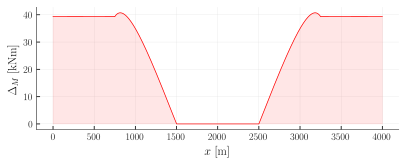

In [56]:
# | label: fig-versatzmoment_sv14
# | fig-cap: "Versatzmoment dargestellt entlang der Stabachse"


plt.plot(x_sv14_concat, (F_inf_array_sv14 - F_M_array_sv14)*z_SV14.to(m), color='red')
plt.fill_between(x_sv14_concat, (F_inf_array_sv14 - F_M_array_sv14)*z_SV14.to(m), color="red", alpha=0.1)

plt.xlabel('$x$ [m]')
plt.ylabel('$\\Delta_M$ [kNm]')
plt.show()

#### Schubverformungen

Die Schubverformungen werden im Modell mittels einer Wegfedercharakteristik in globaler $Z$-Richtung, gemäss dem Koordinatensystem in der @fig-system-SV14, berücksichtigt. Die Wegfedercharakteristik basiert auf der Spannungsfeldmodellierung gemäss der @fig-spannungsfelder_sv14. Es wird vorausgesetzt, dass sämtliche Verformung aus der Schubbewehrung erfolgt, ein Mitwirken des Betons wird vernachlässigt. Die Einteilung in Spannungsfelder ermöglicht die Bestimmung der mitwirkenden Schubbewehrung beim Versagen des Querschnitts. Die Neigung des Feldes ist so gewählt damit der Querkraftwiderstand der Schubbewehrung der Traglast des Systems entspricht.


In [57]:
sigma_w_SV14 = np.array([0.0, 550, 715]) * N / mm**2

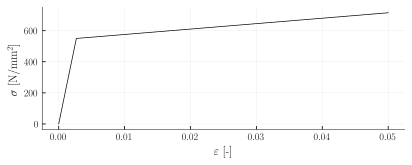

In [58]:
# | label: fig-sigma-epsilon-sv14
# | fig-cap: "Spannungs-Dehnungs-Beziehung der Schubbewehrung, übernommen aus @gitz_ansatze_2024"


epsilon_w_SV14 = np.array([0.0, 550 / 205000, 0.05])

plt.plot(epsilon_w_SV14, sigma_w_SV14, color="black")
# plt.fill_between(to_float(epsilon_w_SV14), to_float(sigma_w_SV14) / 1000**2, color="black", alpha=0.1)
plt.xlabel("$\\varepsilon$ [-]")
plt.ylabel("$\\sigma$ [N/mm$^2$]")
plt.show()

Wird das Spannungs-Dehnungs-Verhalten gemäss der @fig-sigma-epsilon-sv14 berücksichtigt. So resultiert mit der Querschnittsfläche der Schubbewehrung pro Spannungsfeld die entsprechende Kraftkomponente der Wegfedercharakteristik. Die Verformungskomponente entspricht der Dehnung multipliziert mit dem Hebelarm der inneren Kräfte. Dies führt zum Kraft-Verformungs-Verhalten für ein Spannungsfeld. Um die Wegfedercharakteristik eines einzelnen Stabendgelenks zu erhalten, ist die Verformung um die Anzahl an Stabelementen im Spannungsfeld zu reduzieren.

Die verwendeten Parameter sind bereits bei der Bestimmung des Versatzmass aufgezeigt, lediglich der Elastizitätsmodul findet noch Einfluss in die Berechnung.

In [59]:
%%render params
E_sw_SV14 = 205000 * N / mm**2



<IPython.core.display.Latex object>

In [60]:
epsilon_SV14 = epsilon_w_SV14

In [61]:
F_w_SV14 = sigma_w_SV14 * a_sw_SV14 * z_SV14 /tan(theta_c3_SV14)

E_s_SV14 = sigma_w_SV14 / epsilon_SV14

c:\Users\Pascal Gitz\miniconda3\envs\calcs11\Lib\site-packages\pint\facets\plain\quantity.py:976: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(self._magnitude, other_magnitude)


Der Reduktionsfaktor zur Erhöhung der Steifigkeit des Stabendgelenks folgt zu:

In [62]:
%%render symbolic

gamma_E_SV14 = z_SV14 * 1/tan(theta_c3_SV14) / l_E


<IPython.core.display.Latex object>

In [63]:
%%render params 0

gamma_E_SV14

<IPython.core.display.Latex object>

In [64]:
u_sw_SV14 = epsilon_SV14 * z_SV14 / gamma_E_SV14

Die @fig-wegfeder-schub-sv14 zeigt das Kraft-Verformungs-Verhalten für die Gelenke des Stabmodells in vertikaler Richtung. Das Verhalten ist analog dem des biliniearen Spannungs-Dehnungs-Diagramms.

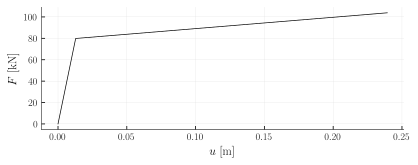

In [65]:
# | label: fig-wegfeder-schub-sv14
# | fig-cap: "Berechnete Wegfedercharakteristik des Schubgelenks vom Versuch SV14"


plt.plot(u_sw_SV14, F_w_SV14.to(kN), color="black")
# plt.fill_between(u_sw_SV14.magnitude, F_w_SV14.magnitude, color="black", alpha=0.1)
plt.xlabel("$u$ [m]")
plt.ylabel("$F$ [kN]")
plt.show()

In [66]:
# Read the Excel file
modell_SV14 = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="SV14_Federmodell"
)
modell_SV14_zugversteift = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="SV14_Federmodell_zugversteift"
)

F_SV14_model = 110

### Ergebnisse

Mit den bestimmten Federcharakteristiken kann die Biegelinie des Systems ermittelt werden unter Berücksichtigung der Schub- und Biegeverformungen auf nicht-linearen Grundlagen. Die @fig-l-w-sv14 zeigt das Last-Verformungs-Diagramm des Systems am Punkt $w_1$. Der Verformungsverlauf zeigt Abweichungen zu den gemessenen Resultate.

In [67]:
# Versuch Tue


w_1_versuch_SV14 = np.array(
    [
        0,
        0.28571428571428825,
        0.44642857142857295,
        0.5000000000000027,
        0.767857142857145,
        1.2500000000000018,
        3.3392857142857153,
        5.750000000000002,
        6.875000000000002,
        9.178571428571432,
        13.25,
        16.78571428571429,
        20.85714285714286,
        24.28571428571429,
        28.035714285714292,
        31.571428571428577,
        33.392857142857146,
        35.160714285714285,
        37.410714285714285,
    ]
)

F_A_versuch_SV14 = np.array(
    [
        0,
        5.315436241610726,
        7.087248322147644,
        8.859060402684563,
        11.516778523489918,
        14.322147651006702,
        20.375838926174495,
        28.791946308724818,
        33.221476510067106,
        41.63758389261744,
        57.583892617449656,
        69.54362416107382,
        78.40268456375838,
        84.60402684563758,
        92.57718120805369,
        99.51677852348993,
        102.02684563758389,
        103.6510067114094,
        104.53691275167785,
    ]
)

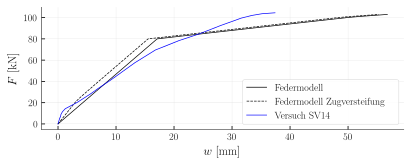

In [68]:
# | label: fig-l-w-sv14
# | fig-cap: "Last-Verformungs-Verlauf am Punkt $w_1$, für das Federmodell und den Versuch"


w_calc_SV14 = modell_SV14["eZ_1 [mm]"] * -1
F_calc_SV14 = modell_SV14["Lpa"] * F_SV14_model

w_calc_SV14_zugversteift = modell_SV14_zugversteift["eZ_1 [mm]"] * -1
F_calc_SV14_zugversteift = modell_SV14_zugversteift["Lpa"] * F_SV14_model


plt.plot(w_calc_SV14, F_calc_SV14, color="black", label="Federmodell")
plt.plot(
    w_calc_SV14_zugversteift,
    F_calc_SV14_zugversteift,
    color="black",
    linestyle="dashed",
    label="Federmodell Zugversteifung",
)

plt.plot(
    w_1_versuch_SV14 - w_1_versuch_SV14[0],
    F_A_versuch_SV14,
    color="blue",
    label="Versuch SV14",
)


plt.xlabel("$w$ [mm]")
plt.ylabel("$F$ [kN]")
plt.legend()
plt.savefig("imgs/F_w_nachrechnung_SV14.svg")
plt.show()



Bis zum Erreichen des ersten Knicks im Verlauf des Federmodells ist das Modell etwas zu steif. Trotzdem ist dies akzeptabel. Der Knick resultiert aus dem Fliessen der Schubbewehrung. Bei den Versuchsresultaten ist bei gleicher Verformung ebenfalls ein Knick zu erkennen. Jedoch lässt sich daraus schliessen, dass die Schubbewehrung bei einem zu hohen Lastniveau beginnt zu fliessen, sowie ist das verfestigende Verhalten nicht gleich mit dem Versuchsverhalten. Möglicherweise müssten die Fliessspannung und die Zugfestigkeit der Schubbewehrung angepasst werden, bzw. nicht aus genormten Produktedokumentation entnommen werden. Sondern aus effektiven Materialproben.

In [69]:
DF_SV14_LS103 = pd.read_excel(
    "calcs/FEM/AxisVM/FEM_daten.xlsx", sheet_name="SV14_Federmodell_maxlast"
).iloc[20:-20,:]
x_array_SV14 = np.linspace(0, 4000, len(DF_SV14_LS103.iloc[:, 0]))

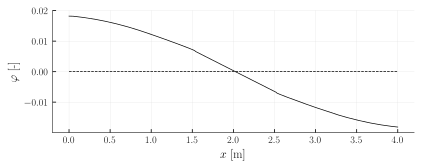

In [70]:
# | label: fig-phi-max-sv14
# | fig-cap: "Verdrehungsverlauf aus dem Federmodell für die Höchstlast des Versuchs SV14"


plt.plot(x_array_SV14/1000, DF_SV14_LS103.iloc[:, -3], color="black")
plt.plot(x_array_SV14/1000, np.zeros(x_array_SV14.shape), color="black", linestyle="dashed")

plt.xlabel("$x$ [m]")
plt.ylabel("$\\varphi$ [-]")
# plt.text(0,0,'ANPASSEN FÜR SV14', color='red')

plt.show()

Der Krümmungsverlauf gibt Aufschluss über den Fliessbereich der Bewehrung, bzw. über den Steifigkeitenverlauf entlang der Stabachse. Die Schubfeder bringt relativ viel Noise in die Resultate.

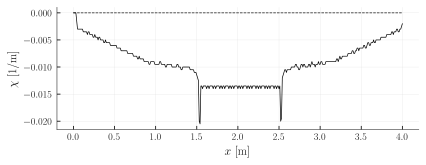

In [71]:
# | label: fig-chi-max-sv14
# | fig-cap: "Berechneter Krümmungsverlauf aus dem Verdrehungsverlauf für den Versuch SV14"


chi_sv14 = np.gradient(DF_SV14_LS103.iloc[:, -3], 0.01)

plt.plot(x_array_SV14 / 1000, chi_sv14, color="black")
plt.plot(x_array_SV14/1000, np.zeros(x_array_SV14.shape), color="black", linestyle="dashed")

plt.ylabel("$\\chi$ [1/m]")
plt.xlabel("$x$ [m]")
plt.savefig("imgs/kruemmungsverlauf_SV14_axis.svg")
plt.show()

## Schlussfolgerung

Das Kapitel der Modellverifizierung zeigt auf, dass mittels dem Modell die Versuchsresultate zufriedenstellend nachgerechnet werden können. Das Modell ermöglicht die Berücksichtigung des Versatzmass, sowie Verformungen basierend auf nicht-linearen Biege- und Schubbeziehung. 